In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

In [16]:
# Reading the dataset
data = pd.read_csv("creditcard.csv")

In [17]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
# Checking the shape of our data
data.shape

(284807, 31)

In [19]:
# Checking the distribution of two classes in the target variable
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [20]:
# Creating the dataset with all independent variables
X = data.iloc[:,:-1]

# Creating the dataset with the dependent variable
Y = data.iloc[:,-1]

In [21]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

In [22]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(227845, 30)

 The shape of test dataset :
(56962, 30)


In [23]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
0    227451
1       394
Name: Class, dtype: int64

 Distribution of classes of dependent variable in test :
0    56864
1       98
Name: Class, dtype: int64


In [24]:
# Hyperparameter tuning
classifier1 = RandomForestClassifier()

In [25]:
grid_values = {'n_estimators':[10, 20], 'max_depth':[3, 5]}

In [26]:
classifier = GridSearchCV(classifier1, param_grid = grid_values, scoring = 'roc_auc', cv=5)

In [29]:
# Fit the object to train dataset
classifier.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5], 'n_estimators': [10, 20]},
             scoring='roc_auc')

In [30]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [31]:
# Obtain accuracy on train set
accuracy_score(Y_train,train_preds)

0.9995391603941276

In [32]:
# Obtain accuracy on test set
accuracy_score(Y_test,test_preds)

0.9993328885923949

In [33]:
# Calculate roc_auc score on train set
roc_auc_score(Y_train,train_preds)

0.8832201533807237

In [34]:
# Calculate roc_auc score on test set
roc_auc_score(Y_test,test_preds)

0.8214021927003777

In [35]:
# Obtain the confusion matrix on train set
confusion_matrix(Y_train,train_preds)

array([[227438,     13],
       [    92,    302]], dtype=int64)

In [36]:
# Obtain the confusion matrix on test set
confusion_matrix(Y_test,test_preds)

array([[56861,     3],
       [   35,    63]], dtype=int64)

In [37]:
features = X_train.columns
importances = classifier.best_estimator_.feature_importances_ ## if best_estimator not chosen so you will face error
indices = np.argsort(importances)

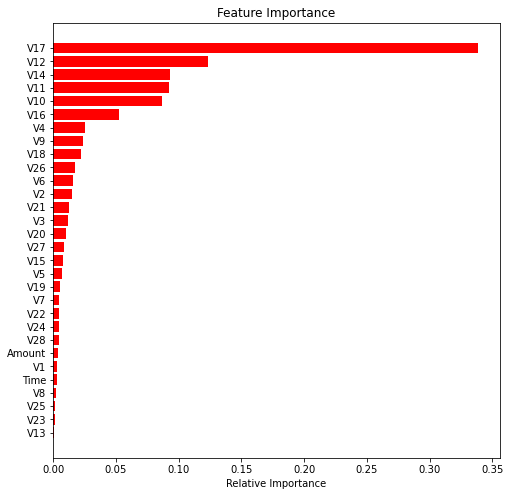

In [38]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()